# Exercício 1 - Algoritmo Genético para Alocação de Gateways em Aeroportos

```json
"Aluno":{
    "nome":"Ruan David da Silva",
    "Ra":22051922,
},
"Matéria":"Inteligência Artificial",
"Professor":"Fábio Oliveira Guimarães",
```

#### Objetivo:

Usar um Algoritmo Genético (AG) para otimizar a alocação de gateways (pontos de acesso) em um aeroporto,
minimizando o tempo médio de deslocamento dos passageiros entre os terminais e os gateways,
considerando restrições de capacidade e distância.

---

## Problema:
Um aeroporto possui:
- 5 terminais (T1 a T5) com demanda de passageiros:
    - o T1=200, T2=150, T3=300, T4=250, T5=100 (passageiros/hora).
- 3 gateways disponíveis (G1,G2,G3 ), cada um com capacidade máxima de 500 passageiros/hora.
- Matriz de distâncias (em metros) entre terminais e gateways:

|G1 | G2 | G3 |
|---|---|---|
|T1 | 100 | 300 | 500|
|T2 | 200 | 100 | 400|
|T3 | 300 | 200 | 100|
|T4 | 400 | 500 | 200|
|T5 | 500 | 400 | 300|

#### Objetivo:
Alocar cada terminal a um único gateway, respeitando a capacidade, de forma a minimizar a **distância total ponderada:**

![funcao minimizar z](./assets/minimizarZ.png)

Onde:
- dij: distância entre terminal i e gateway j.
- xij=1 se Ti está alocado a Gj, senão 0.
- pi: demanda do terminal i.

---

## Implementação do Algoritmo Genético:

1. Representação do Cromossomo (Solução):
    -  Codificação binária: Cada gene representa a alocação de um terminal a um gateway.
        - Exemplo: [1, 0, 0 | 0, 1, 0 | 0, 0, 1 | 1, 0, 0 | 0, 1, 0]
            - T1→G1, T2→G2, T3→G3, T4→G1, T5→G2.

2. População Inicial:
    - Gerar aleatoriamente 6 cromossomos válidos (respeitando a capacidade dos gateways).

3. Função de Fitness:
    - Avaliar cada solução usando:
    
    Fitness=11+ZFitness=1+Z1

    (Quanto maior o fitness, melhor a solução).
   
5. Seleção (Método da Roleta):
    - Selecionar pais com probabilidade proporcional ao fitness.

6. Crossover (Recombinação):
    - Ponto de corte aleatório: Trocar partes dos cromossomos dos pais.
        - Exemplo:
            - Pai 1: [1,0,0 | 0,1,0 | 0,0,1 | 1,0,0 | 0,1,0]
            - Pai 2: [0,1,0 | 1,0,0 | 0,1,0 | 0,0,1 | 1,0,0]
            - Filho: [1,0,0 | 0,1,0 | 0,1,0 | 0,0,1 | 0,1,0]

7. Mutação:

    - Trocar aleatoriamente um gene (ex.: T3 de G3 para G1).

8. Critério de Parada:

    - Nº máximo de gerações (ex.: 50) ou solução estável por 10 gerações.

---

#### Exemplo de Solução Ótima Esperada: 
- **Alocação**
    - G1: T1,T4 (Total = 450 <= 500)
    - G2: T2,T5 (Total = 250 <= 500)
    - G3: T3 (Total = 300 <= 500)
- **Distância Total Ponderada:**

Z = (100 * 200) + (100 * 150) + (100 * 300) + (200 * 250) + (100 * 100) = 140.000 metros

#### Tarefas:
1. Implemente o AG em Python e mostre a evolução das soluções.
2. Verifique se a solução encontrada respeita as restrições de capacidade.
3. Modifique o problema para **5 gateways** e compare os resultados.

**Dica:** Use penalizações no fitness para soluções inválidas (ex: gateway superlotado).

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [15]:
demandas = [200, 150, 300, 250, 100]

capacidades = [500, 500, 500]

distancias = [
    [100, 300, 500],  # T1
    [200, 100, 400],  # T2
    [300, 200, 100],  # T3
    [400, 500, 200],  # T4
    [500, 400, 300]   # T5
]

In [16]:
def inicializar_populacao(tamanho_populacao, num_terminais, num_gateways):
    return [[random.randint(0, num_gateways - 1) for _ in range(num_terminais)] for _ in range(tamanho_populacao)]

In [17]:
def calcular_fitness(individuo, demandas, distancias, capacidades):
    carga_gateways = [0] * len(capacidades)
    total_distancia = 0
    for terminal, gateway in enumerate(individuo):
        total_distancia += demandas[terminal] * distancias[terminal][gateway]
        carga_gateways[gateway] += demandas[terminal]
    
    # Penalizar soluções que excedem a capacidade dos gateways
    penalidade = sum(max(0, carga_gateways[g] - capacidades[g]) for g in range(len(capacidades)))
    return total_distancia + 1000 * penalidade  # Penalidade alta para soluções inválidas

In [18]:
def selecao_roleta(populacao, fitness):
    soma_fitness = sum(fitness)
    probabilidades = [f / soma_fitness for f in fitness]
    return random.choices(populacao, weights=probabilidades, k=2)

In [19]:
def crossover(pai1, pai2):
    ponto_corte = random.randint(1, len(pai1) - 1)
    return pai1[:ponto_corte] + pai2[ponto_corte:], pai2[:ponto_corte] + pai1[ponto_corte:]

In [20]:
def mutacao(individuo, taxa_mutacao, num_gateways):
    for i in range(len(individuo)):
        if random.random() < taxa_mutacao:
            individuo[i] = random.randint(0, num_gateways - 1)
    return individuo

In [21]:
def algoritmo_genetico(num_geracoes, tamanho_populacao, taxa_mutacao, demandas, distancias, capacidades):
    num_terminais = len(demandas)
    num_gateways = len(capacidades)
    populacao = inicializar_populacao(tamanho_populacao, num_terminais, num_gateways)
    
    historico_fitness = []  # Para armazenar a evolução das soluções e plotar o gráfico no final
    
    for geracao in range(num_geracoes):
        fitness = [calcular_fitness(individuo, demandas, distancias, capacidades) for individuo in populacao]
        historico_fitness.append(min(fitness))
        
        nova_populacao = []
        while len(nova_populacao) < tamanho_populacao:
            pai1, pai2 = selecao_roleta(populacao, fitness)
            filho1, filho2 = crossover(pai1, pai2)
            nova_populacao.append(mutacao(filho1, taxa_mutacao, num_gateways))
            nova_populacao.append(mutacao(filho2, taxa_mutacao, num_gateways))
        
        populacao = nova_populacao[:tamanho_populacao]
    
    fitness = [calcular_fitness(individuo, demandas, distancias, capacidades) for individuo in populacao]
    melhor_indice = fitness.index(min(fitness))
    
    return populacao[melhor_indice], min(fitness), historico_fitness

In [22]:
def visualizar_evolucao(historico_fitness):
    plt.plot(historico_fitness)
    plt.title("Evolução do Fitness")
    plt.xlabel("Geração")
    plt.ylabel("Fitness")
    plt.show()

Melhor solução encontrada: [1, 0, 0, 2, 2]
Fitness da melhor solução: 260000


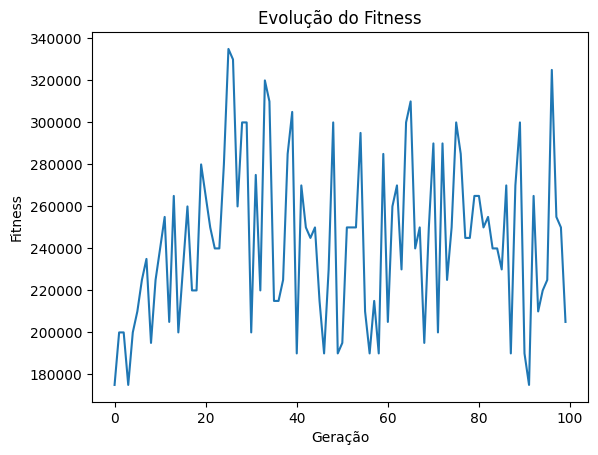

In [23]:
# Problema com 3 gateways:
melhor_solucao, melhor_fitness, historico_fitness = algoritmo_genetico(
    num_geracoes=100,
    tamanho_populacao=50,
    taxa_mutacao=0.1,
    demandas=demandas,
    distancias=distancias,
    capacidades=capacidades
)

print("Melhor solução encontrada:", melhor_solucao)
print("Fitness da melhor solução:", melhor_fitness)
visualizar_evolucao(historico_fitness)

Melhor solução com 5 gateways: [4, 0, 2, 0, 2]
Fitness com 5 gateways: 370000


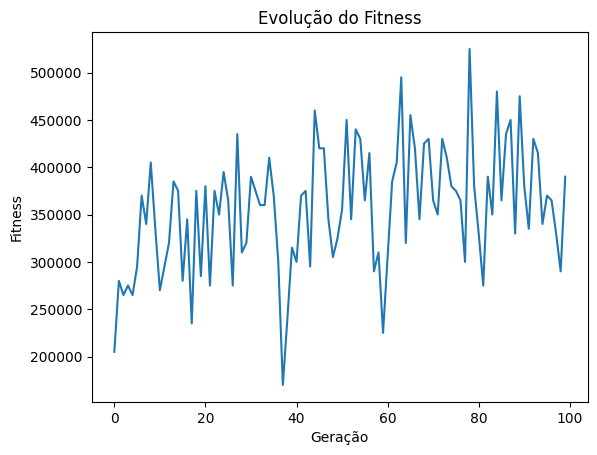

In [25]:
# 5 gateways
capacidades_5_gateways = [500, 500, 500, 500, 500]
distancias_5_gateways = [
    [100, 300, 500, 700, 900],  
    [200, 100, 400, 600, 800],  
    [300, 200, 100, 500, 700],  
    [400, 500, 200, 100, 600],  
    [500, 400, 300, 200, 100]   
]

melhor_solucao_5, melhor_fitness_5, historico_fitness_5 = algoritmo_genetico(
    num_geracoes=100,
    tamanho_populacao=50,
    taxa_mutacao=0.1,
    demandas=demandas,
    distancias=distancias_5_gateways,
    capacidades=capacidades_5_gateways
)

print("Melhor solução com 5 gateways:", melhor_solucao_5)
print("Fitness com 5 gateways:", melhor_fitness_5)
visualizar_evolucao(historico_fitness_5)